In [2]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
sns.set(style='whitegrid')

In [5]:
data = pd.read_csv('heart.csv')
print(F"Null values? {data.isnull().values.any()}")

Null values? False


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


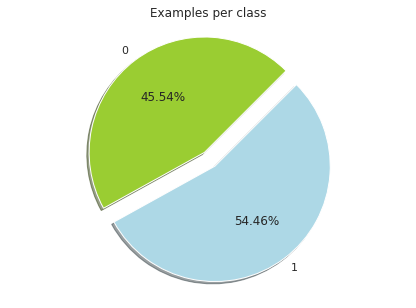

In [7]:
# Number of examples per class
plt.figure(figsize=(7, 5))
count_per_class = [len(data[data['target'] == 0]),len(data[data['target'] == 1])]
labels = [0, 1]
colors = ['yellowgreen', 'lightblue']
explode = (0.05, 0.1)
plt.pie(count_per_class, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
plt.title('Examples per class')
plt.axis('equal')
plt.show()

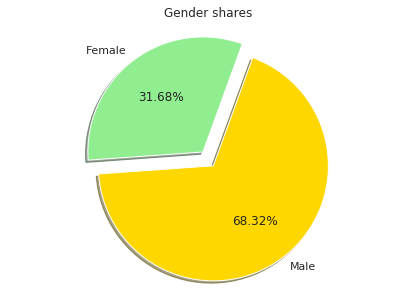

In [8]:
# Gender shares in dataset
plt.figure(figsize=(7, 5))
count_per_class = [len(data[data['sex'] == 0]),len(data[data['sex'] == 1])]
labels = ['Female', 'Male']
colors = ['lightgreen', 'gold']
explode = (0.05, 0.1)
plt.pie(count_per_class, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=70)
plt.title('Gender shares')
plt.axis('equal')
plt.show()

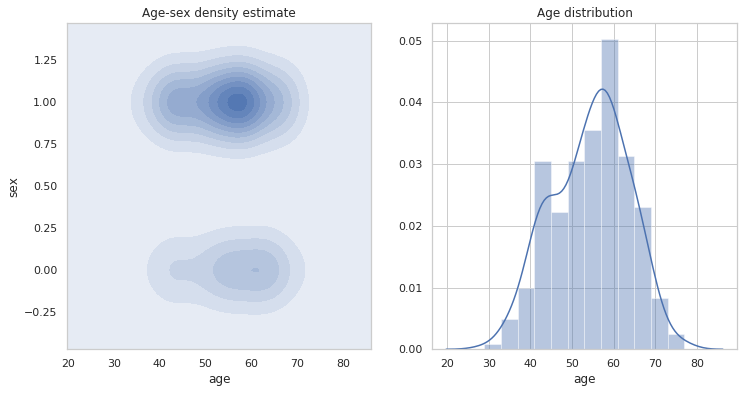

In [10]:
# Age-sex distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data['age'], data['sex'], shade=True)
plt.title('Age-sex density estimate')
plt.subplot(1, 2, 2)
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

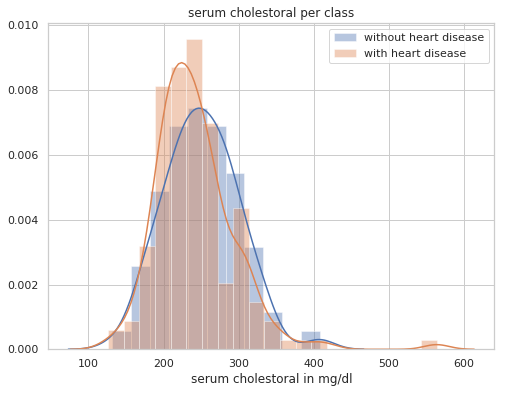

In [11]:
# Serum cholestoral per class distribution
plt.figure(figsize=(8, 6))
sns.distplot(data[data.target == 0]['chol'], label='without heart disease')
sns.distplot(data[data.target == 1]['chol'], label='with heart disease')
plt.xlabel('serum cholestoral in mg/dl')
plt.title('serum cholestoral per class')
plt.legend()
plt.show()

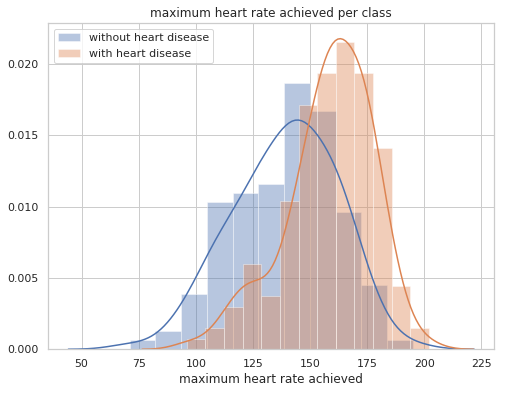

In [12]:
# Maximum heart rate achieved per class distribution
plt.figure(figsize=(8, 6))
sns.distplot(data[data.target == 0]['thalach'], label='without heart disease')
sns.distplot(data[data.target == 1]['thalach'], label='with heart disease')
plt.title('maximum heart rate achieved per class')
plt.xlabel('maximum heart rate achieved')
plt.legend()
plt.show()

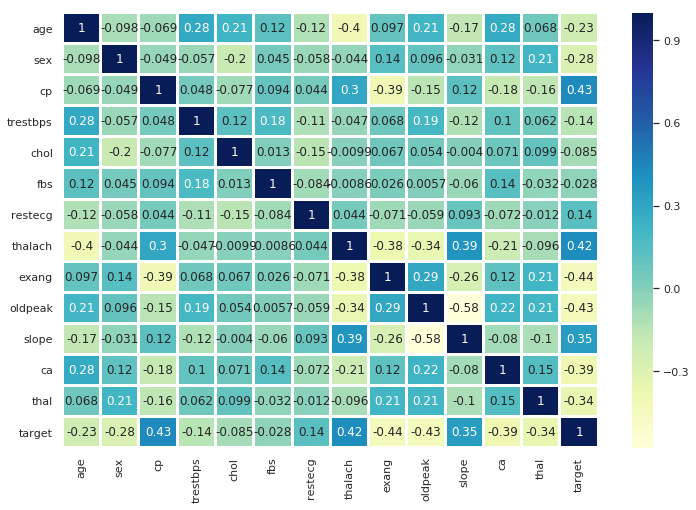

In [13]:
# Features heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, linewidths=2, cmap="YlGnBu")
plt.show()

In [0]:
X = data.values[:, :13]
y = data.values[:, 13]

In [17]:
#!pip install eli5
import eli5
from sklearn.linear_model import LogisticRegression
from eli5.sklearn import PermutationImportance

logistic_regression = LogisticRegression(penalty='l1')
logistic_regression.fit(X, y)
perm_imp = PermutationImportance(logistic_regression, random_state=42).fit(X, y)
eli5.show_weights(perm_imp, feature_names = data.columns.tolist()[:13])

Weight,Feature
0.0535 ± 0.0179,ca
0.0515 ± 0.0272,cp
0.0469 ± 0.0219,sex
0.0370 ± 0.0255,thalach
0.0125 ± 0.0114,thal
0.0099 ± 0.0167,slope
0.0099 ± 0.0110,exang
0.0092 ± 0.0234,oldpeak
0.0053 ± 0.0090,restecg
0.0053 ± 0.0122,age


In [0]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

def nested_kfold_cv(model, param_grid, X, y, outer_metric=accuracy_score,
                    scoring='accuracy' , k1=10, k2=3, verbose = 1, n_jobs=3, shuffle=True):
    scores = []
    estimators = []
    kf = KFold(n_splits=k1, shuffle=shuffle)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=k2,
                                   verbose=verbose, n_jobs=n_jobs, scoring=scoring)
        grid_search.fit(X=X_train, y=y_train)
        estimator = grid_search.best_estimator_
        estimators.append(estimator)
        estimator.fit(X_train, y_train)
        scores.append(outer_metric(estimator.predict(X_test), y_test))
    return estimators, scores

## Adaboost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, confusion_matrix

In [0]:
tree_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    random_state=42
)

In [21]:
tree_params = {
    'n_estimators': [25, 50, 75]
}
estimators, tree_scores = nested_kfold_cv(tree_model, tree_params, X, y, outer_metric=recall_score,
                                     scoring='f1' , k1=10, k2=5, verbose = 0, n_jobs=4, shuffle=True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The def

In [22]:
print(f"Average recall: {np.mean(tree_scores)}")

Average recall: 0.8050331286360697


## SVM

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.svm import SVC

In [0]:
svm_model = Pipeline(steps=[
    ('standard_scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif)), # params: k
    ('svm', SVC(kernel='rbf', random_state=42)) # params: gamma, C
])

In [25]:
svm_grid = {
    'feature_selection__k': [10, 12, 13],
    'svm__C': [3, 5, 10, 15, 20, 25, 30, 35],
    'svm__gamma': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    
}
estimators, svm_scores = nested_kfold_cv(svm_model, svm_grid, X, y, outer_metric=recall_score,
                                     scoring='f1' , k1=10, k2=5, verbose = 0, n_jobs=4, shuffle=True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The def

In [26]:
print(f"Average recall: {np.mean(svm_scores)}")

Average recall: 0.7923393655707897


## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_model = Pipeline(steps=[
    ('feature_selection', SelectKBest(f_classif)), # params: k
    ('log', LogisticRegression()) # params:  C
])

In [29]:
log_grid = {
    'log__C': [0.01, 0.1, 0.5, 1, 3, 5],
    'feature_selection__k': [5, 9, 10, 12, 13],
}
estimators, lr_scores = nested_kfold_cv(log_model, log_grid, X, y, outer_metric=recall_score,
                                     scoring='f1' , k1=10, k2=5, verbose = 0, n_jobs=4, shuffle=True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The def

In [30]:
print(f"Average recall: {np.mean(lr_scores)}")

Average recall: 0.8037929717341482


## Classification results overview

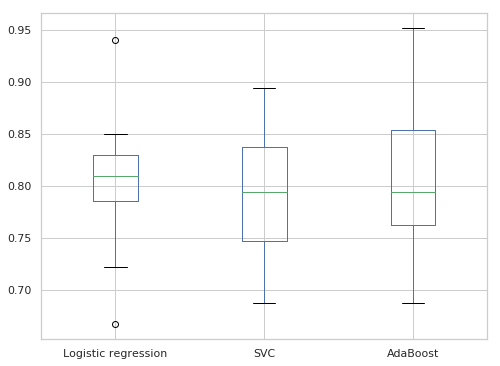

In [31]:
results = pd.DataFrame({'Logistic regression': lr_scores, 'SVC': svm_scores, 'AdaBoost': tree_scores})
results.boxplot(figsize=(8, 6))